## Problem Definition:
### The problem definition involves understanding and processing the data coming out of data engineering pipelines at Delhivery. The key tasks are:

### Data Cleaning and Exploration:

    Handle missing values in the data.
    Analyze the structure of the data.
    Merge rows based on specified columns using groupby and aggregations.
    Build features from fields like Destination Name, Source Name, and Trip_creation_time.
    
### In-depth Analysis and Feature Engineering:

    Calculate the time taken between od_start_time and od_end_time.
    Conduct hypothesis testing/visual analysis on various time and distance fields.
    Find and handle outliers in numerical variables.

### Categorical Data Handling:

    Perform one-hot encoding on categorical variables like route_type.

### Normalization/Standardization:

    Apply MinMaxScaler or StandardScaler to numerical features.
    
### Exploratory Data Analysis (EDA):

    Derive insights from the data.
    Visualize the distribution of continuous variables and boxplots of categorical variables.
    Analyze the relationship between variables.
    
### Provide Business Insights and Recommendations:

    Identify patterns observed in the data.
    Provide actionable recommendations for the business, such as understanding order origins, busiest corridors, average distances, and times.
    
### This analysis aims to help Delhivery gain a better understanding of their delivery data, optimize their operations, and make informed decisions based on the insights derived from the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delhivery_data.csv')
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [3]:
df.shape

(144867, 24)

In [4]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [6]:
df.describe().T

count        mean          std         min  \
start_scan_to_end_scan          144316.0  963.697698  1038.082976   20.000000   
cutoff_factor                   144316.0  233.561345   345.245823    9.000000   
actual_distance_to_destination  144316.0  234.708498   345.480571    9.000045   
actual_time                     144316.0  417.996237   598.940065    9.000000   
osrm_time                       144316.0  214.437055   308.448543    6.000000   
osrm_distance                   144316.0  285.549785   421.717826    9.008200   
factor                          144316.0    2.120178     1.717065    0.144000   
segment_actual_time             144316.0   36.175379    53.524298 -244.000000   
segment_osrm_time               144316.0   18.495697    14.774008    0.000000   
segment_osrm_distance           144316.0   22.818993    17.866367    0.000000   
segment_factor                  144316.0    2.218707     4.854804  -23.444444   

                                       25%         50%          75%  \
start_scan_to_end_scan          161.000000  451.000000  1645.000000   
cutoff_factor                    22.000000   66.000000   286.000000   
actual_distance_to_destination   23.352027   66.135322   286.919294   
actual_time                      51.000000  132.000000   516.000000   
osrm_time                        27.000000   64.000000   259.000000   
osrm_distance                    29.896250   78.624400   346.305400   
factor                            1.604545    1.857143     2.212280   
segment_actual_time              20.000000   28.000000    40.000000   
segment_osrm_time                11.000000   17.000000    22.000000   
segment_osrm_distance            12.053975   23.508300    27.813325   
segment_factor                    1.347826    1.684211     2.250000   

                                        max  
start_scan_to_end_scan          7898.000000  
cutoff_factor                   1927.000000  
actual_distance_to_destination  1927.447705  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199100  
factor                            77.387097  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403700  
segment_factor                   574.250000

###     2. Feature Creation 

In [7]:
# Creating columns city, place_code, state from source_name

# Assuming your column is named 'timestamp'
df['timestamp'] = pd.to_datetime(df['trip_creation_time'])

# Extracting year, month, and day
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

# the date part (without the time)
df['date'] = df['timestamp'].dt.date

# the time part
df['time'] = df['timestamp'].dt.time

df.head(1)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... segment_actual_time  segment_osrm_time  \
0  2018-09-20 03:21:32.418600  ...                14.0               11.0   

   segment_osrm_distance  segment_factor                  timestamp  year  \
0                11.9653        1.272727 2018-09-20 02:35:36.476840  2018   

   month  day        date             time  
0      9   20  2018-09-20  02:35:36.476840  

[1 rows x 30 columns]

In [8]:
state = df['source_name'].str.split('-', expand=True)[0].str.split('(', expand = True)[1]
state = state.str.replace(")","")
df["state"] = state

In [9]:
City = df['source_name'].str.split('-', expand=True)[0].str.split('(', expand = True)[0].str.split("_", expand = True)[0]
df['city'] = City

In [10]:
Place = df['source_name'].str.split('-', expand=True)[0].str.split('(', expand = True)[0].str.split("_", expand = True)[1]
df['place'] = Place

In [11]:
df.head(1)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... segment_factor                  timestamp  \
0  2018-09-20 03:21:32.418600  ...       1.272727 2018-09-20 02:35:36.476840   

   year  month day        date             time    state   city    place  
0  2018      9  20  2018-09-20  02:35:36.476840  Gujarat  Anand  VUNagar  

[1 rows x 33 columns]

### Pairplot

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [13]:
df_numeric = df.select_dtypes(include = np.number)
df_numeric.head(1)

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
0                    86.0              9                        10.43566   

   actual_time  osrm_time  osrm_distance    factor  segment_actual_time  \
0         14.0       11.0        11.9653  1.272727                 14.0   

   segment_osrm_time  segment_osrm_distance  segment_factor  year  month  day  
0               11.0                11.9653        1.272727  2018      9   20

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


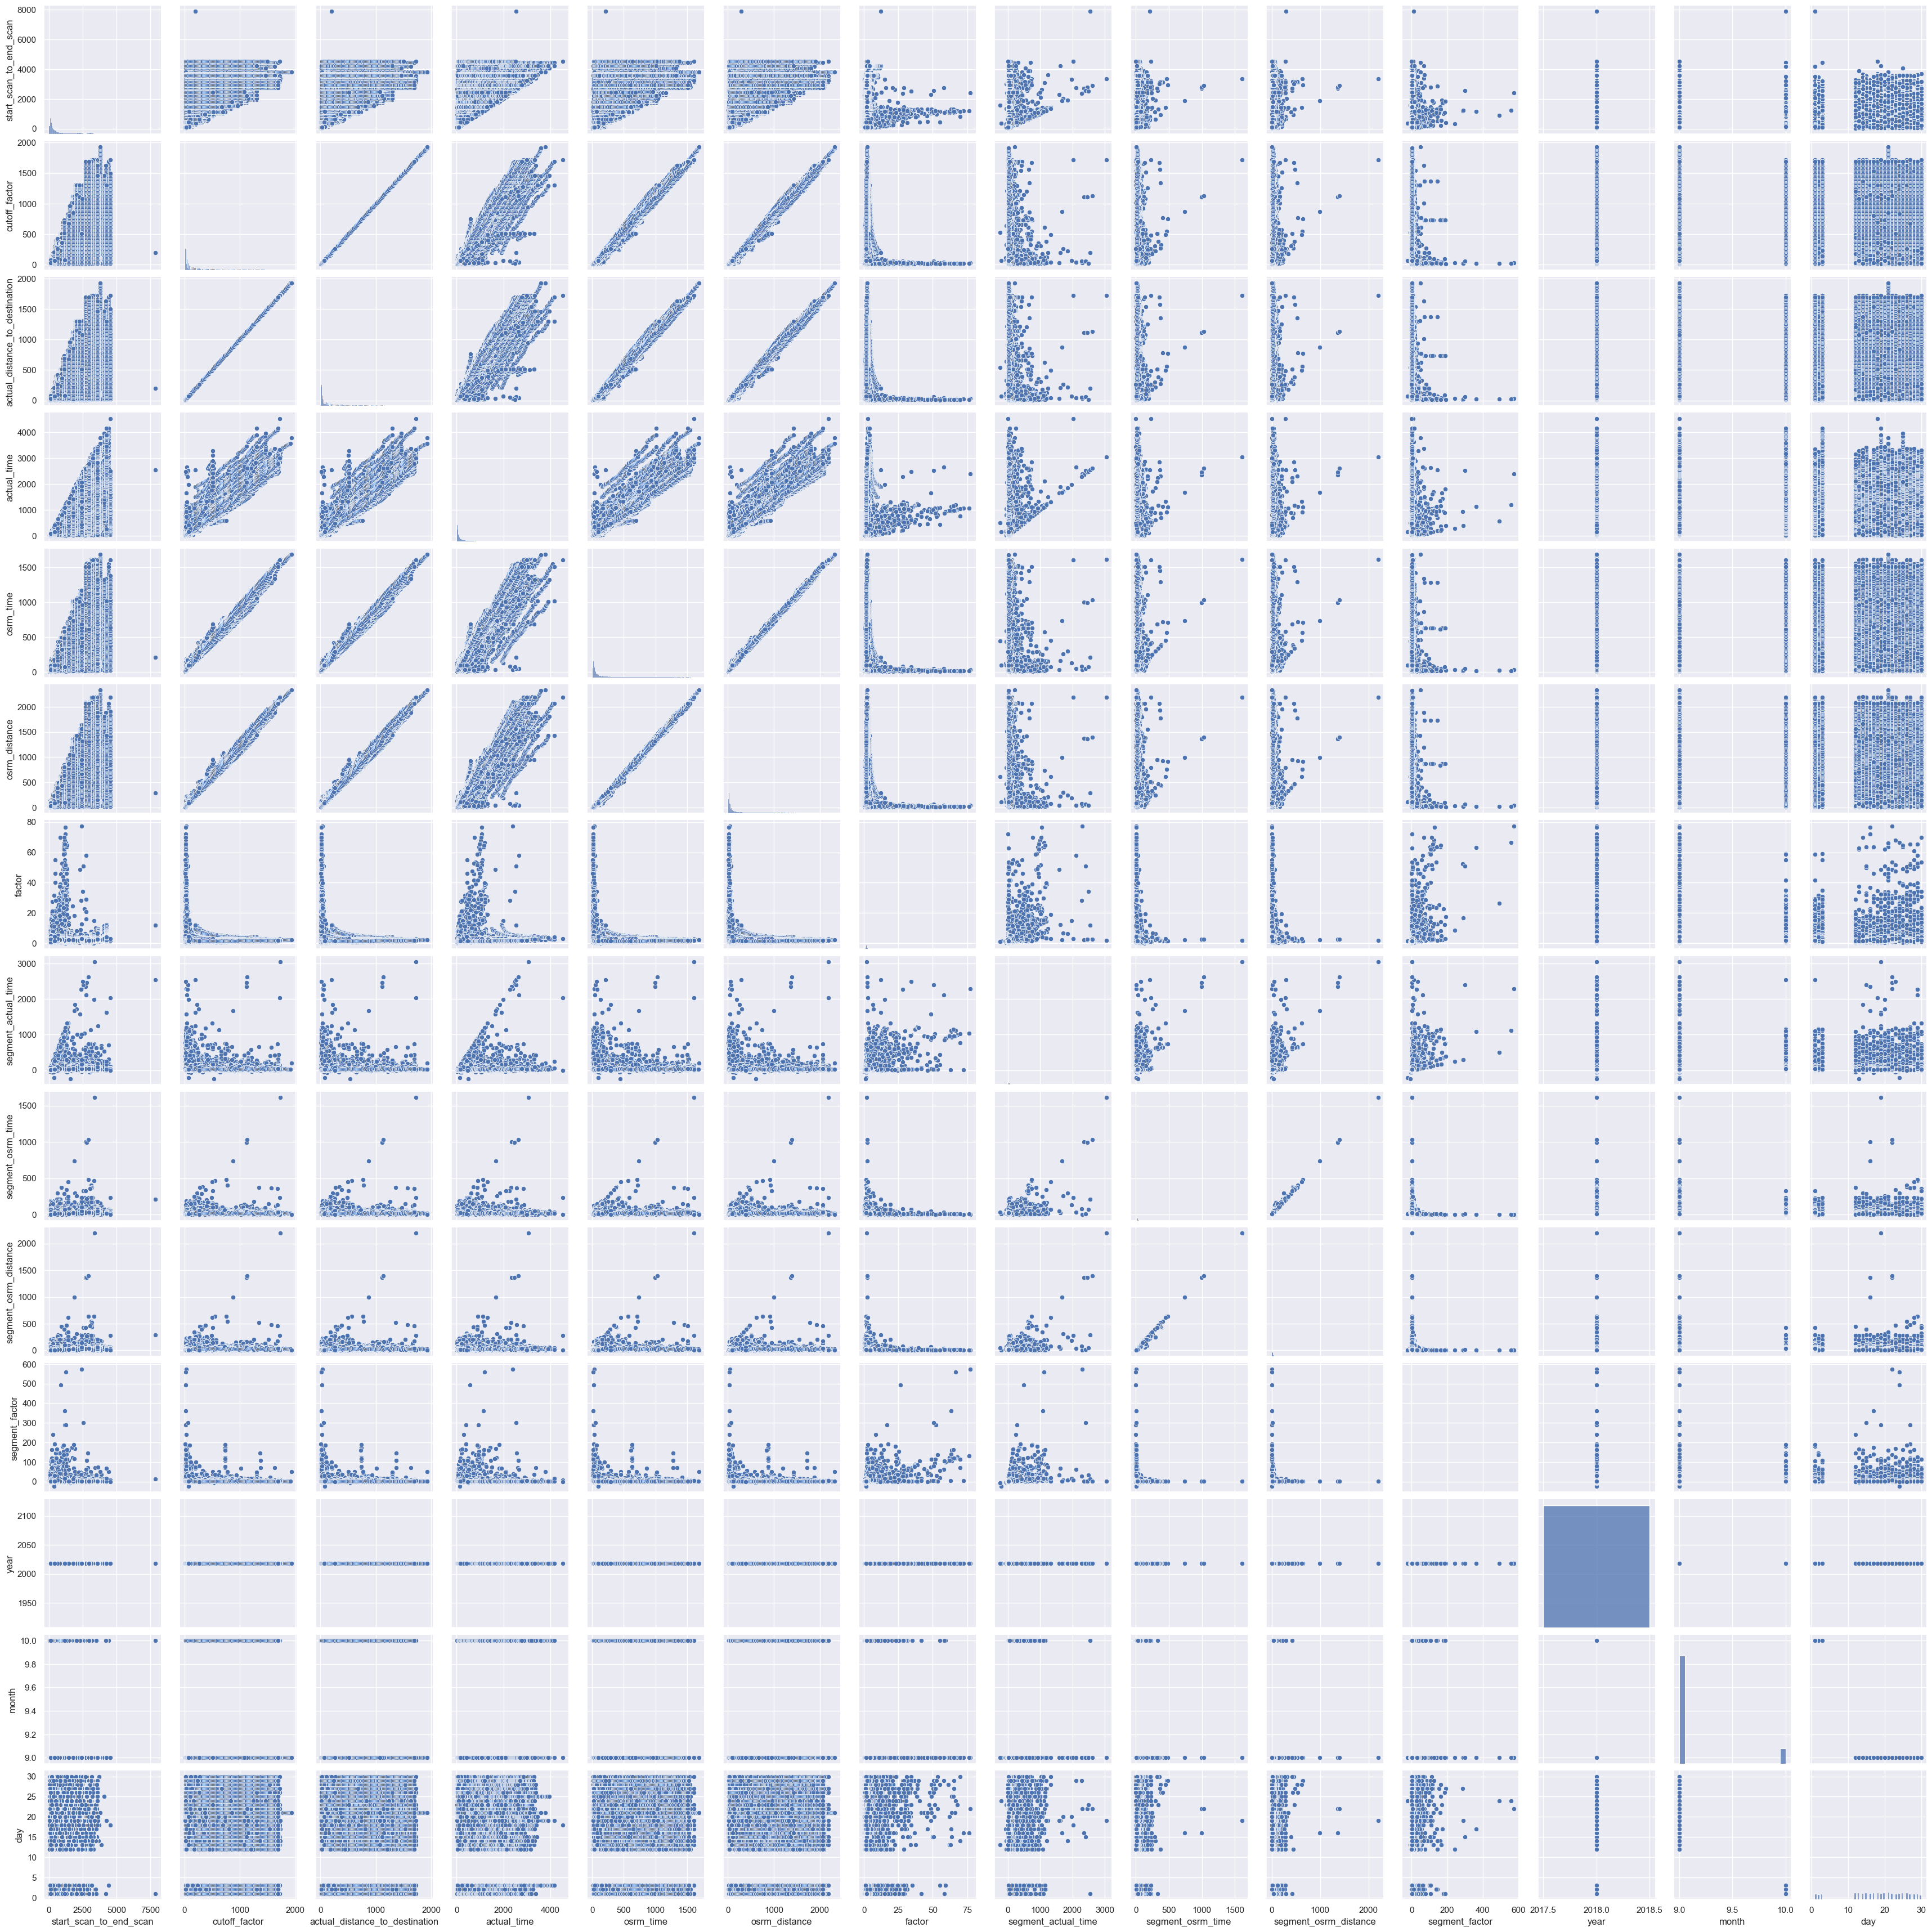

In [14]:
sns.pairplot(df_numeric)
plt.show()

### Heatmap of Correlation Matrix

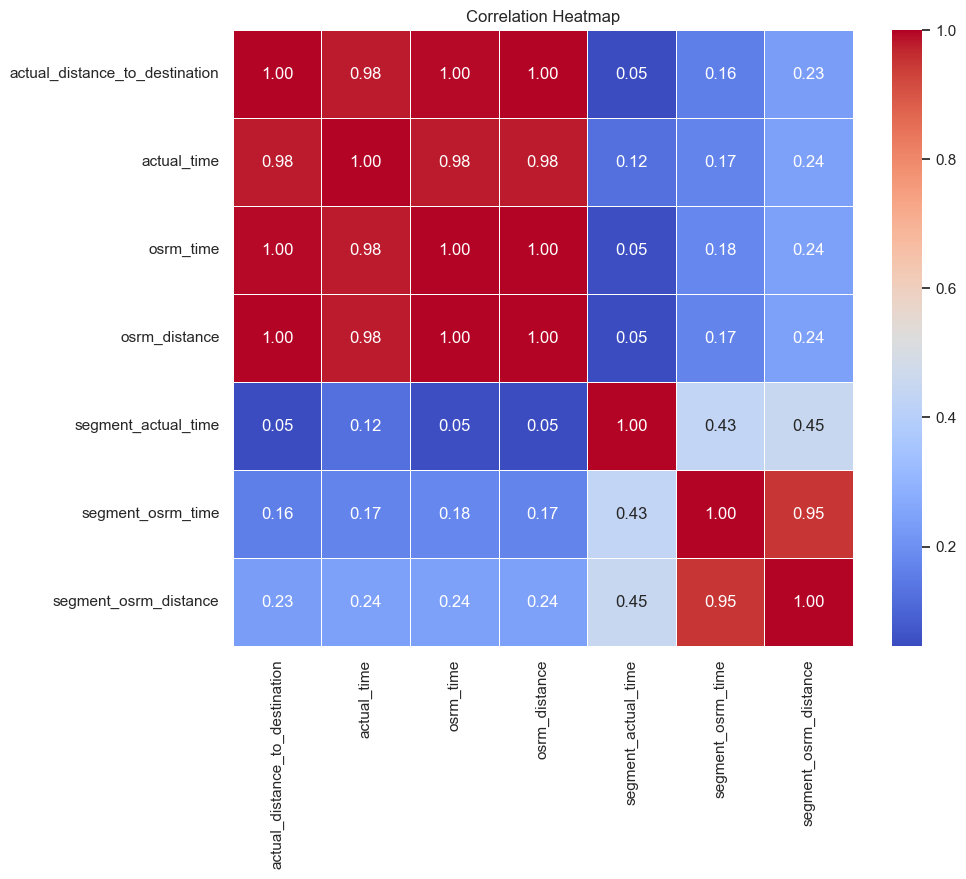

In [15]:
# Select relevant numerical columns for the heatmap
numerical_columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###     3. Merging of rows and aggregation of fields 

In [16]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [17]:
df['time_taken'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60
df.drop(['od_start_time', 'od_end_time'], axis=1, inplace=True)


In [18]:
df.head(2)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  start_scan_to_end_scan  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   

   ...                  timestamp  year month  day        date  \
0  ... 2018-09-20 02:35:36.476840  2018     9   20  2018-09-20   
1  ... 2018-09-20 02:35:36.476840  2018     9   20  2018-09-20   

              time    state   city    place  time_taken  
0  02:35:36.476840  Gujarat  Anand  VUNagar   86.213637  
1  02:35:36.476840  Gujarat  Anand  VUNagar   86.213637  

[2 rows x 32 columns]

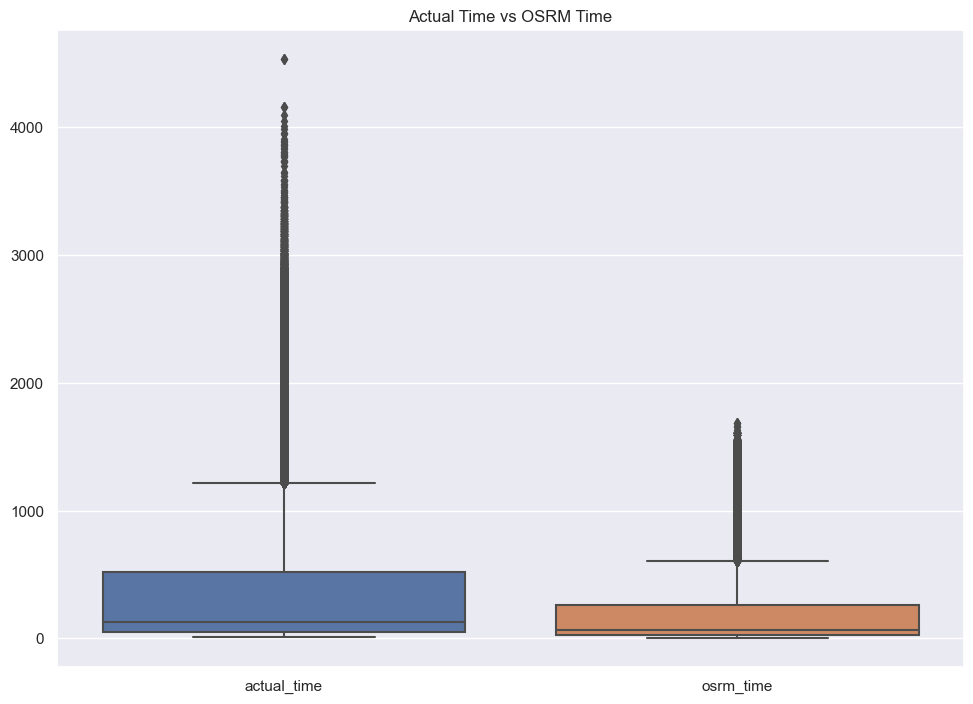

T-statistic: 114.78426093226781, P-value: 0.0


In [20]:
sns.boxplot(data=df[['actual_time', 'osrm_time']])
plt.title('Actual Time vs OSRM Time')
plt.show()

# Hypothesis Testing
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(df['actual_time'], df['osrm_time'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_val}')


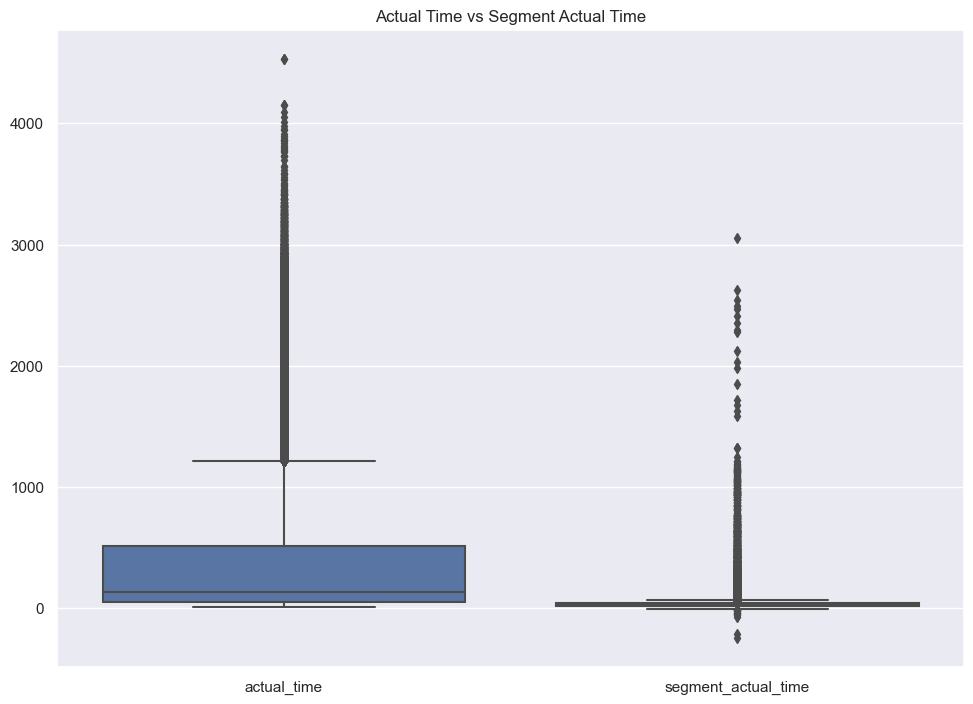

T-statistic: 241.21607830415618, P-value: 0.0


In [21]:
# Visual analysis
sns.boxplot(data=df[['actual_time', 'segment_actual_time']])
plt.title('Actual Time vs Segment Actual Time')
plt.show()

# Hypothesis Testing
t_stat, p_val = stats.ttest_ind(df['actual_time'], df['segment_actual_time'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_val}')


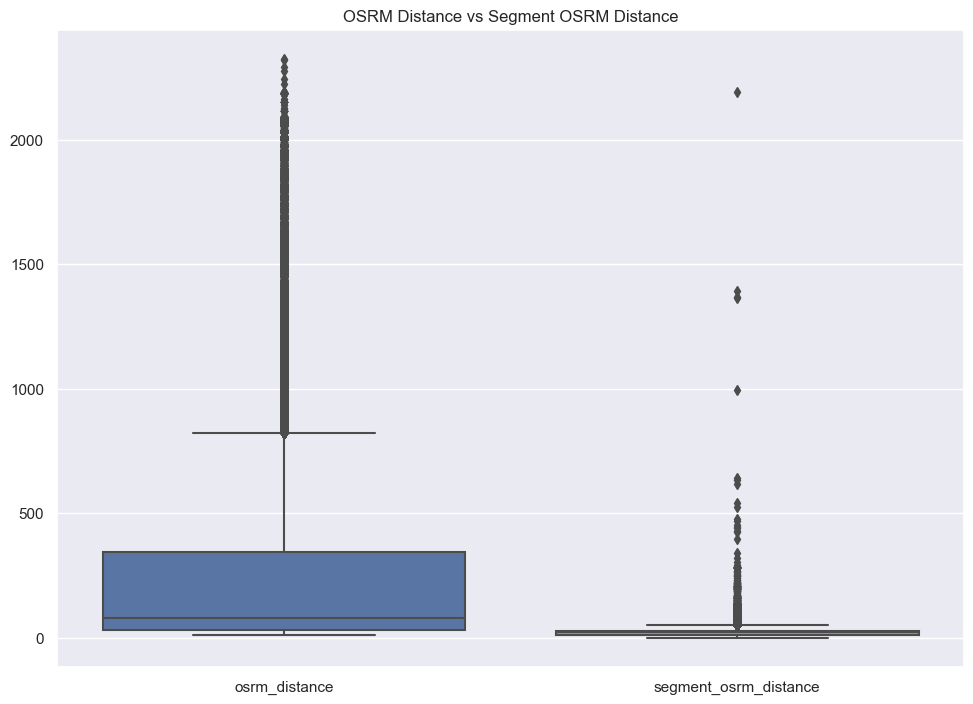

U-statistic: 17712324562.0, P-value: 0.0


In [22]:
# Visual analysis
sns.boxplot(data=df[['osrm_distance', 'segment_osrm_distance']])
plt.title('OSRM Distance vs Segment OSRM Distance')
plt.show()

# Hypothesis Testing
t_stat, p_val = stats.mannwhitneyu(df['osrm_distance'], df['segment_osrm_distance'], alternative='two-sided')
print(f'U-statistic: {t_stat}, P-value: {p_val}')


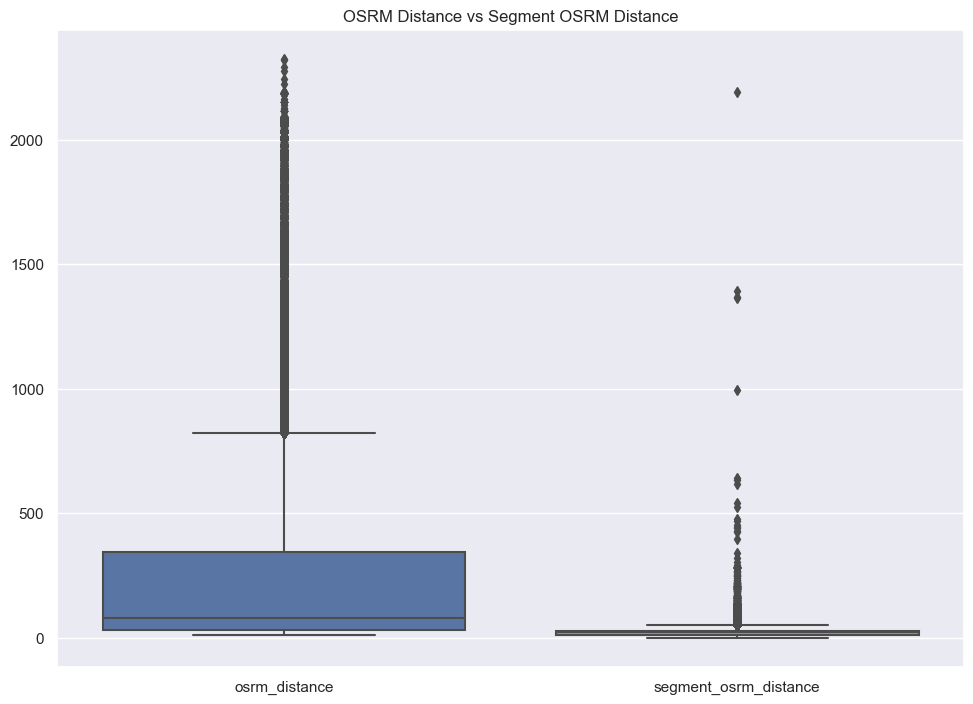

U-statistic: 17712324562.0, P-value: 0.0


In [23]:
# Visual analysis
sns.boxplot(data=df[['osrm_distance', 'segment_osrm_distance']])
plt.title('OSRM Distance vs Segment OSRM Distance')
plt.show()

# Hypothesis Testing
t_stat, p_val = stats.mannwhitneyu(df['osrm_distance'], df['segment_osrm_distance'], alternative='two-sided')
print(f'U-statistic: {t_stat}, P-value: {p_val}')


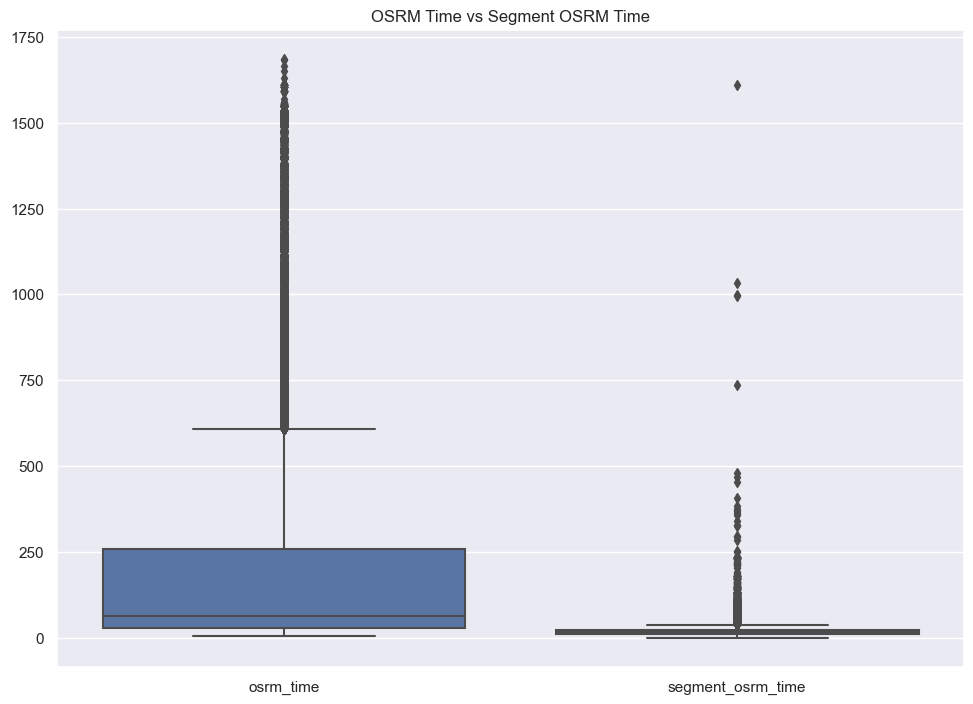

U-statistic: 18118297754.5, P-value: 0.0


In [24]:
# Visual analysis
sns.boxplot(data=df[['osrm_time', 'segment_osrm_time']])
plt.title('OSRM Time vs Segment OSRM Time')
plt.show()

# Hypothesis Testing
t_stat, p_val = stats.mannwhitneyu(df['osrm_time'], df['segment_osrm_time'], alternative='two-sided')
print(f'U-statistic: {t_stat}, P-value: {p_val}')


## Comparision of time and distance

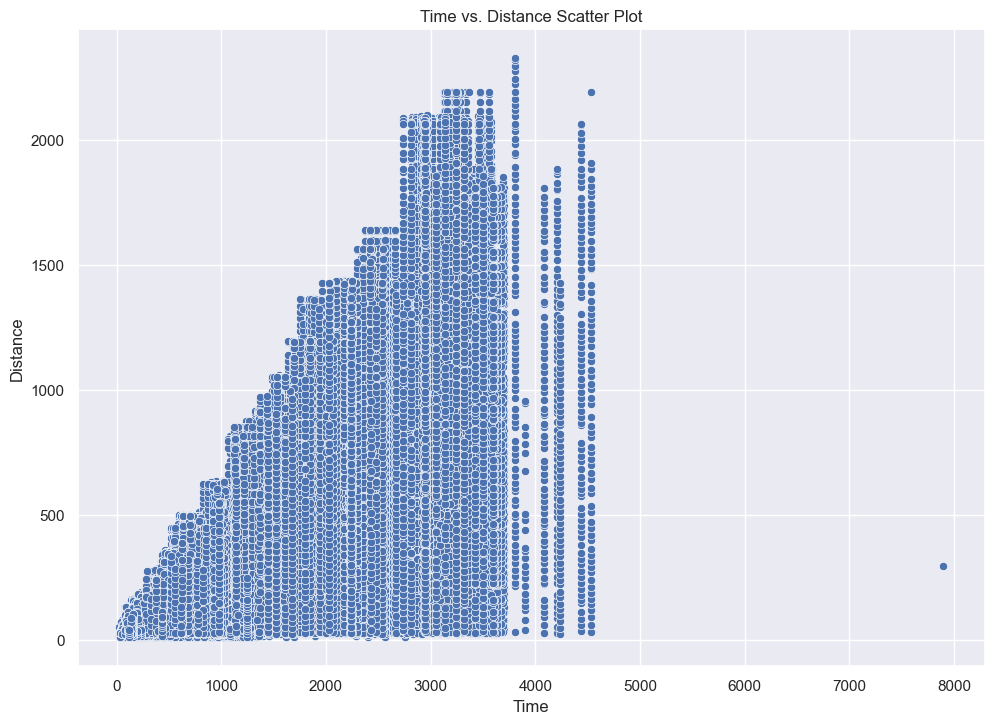

In [25]:
sns.scatterplot(x='time_taken', y='osrm_distance', data=df)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Time vs. Distance Scatter Plot')
plt.show()

In [26]:
aggregated_df = df.groupby(['state', 'month']).agg(
    average_delivery_time=('time_taken', 'mean'),
    total_order_volume=('time_taken', 'count')
).reset_index()

## Relation between Total Order Volume and Average Delivery Time

In [27]:
import plotly.express as px


custom_palette = px.colors.qualitative.Set1
fig = px.scatter(aggregated_df, x='average_delivery_time', y='total_order_volume',
                 color='state', symbol='state',
                 color_discrete_sequence=custom_palette,
                 symbol_sequence=['circle', 'square', 'diamond', 'cross', 'x'],
                 labels={'average_delivery_time': 'Average Delivery Time', 'total_order_volume': 'Total Order Volume'},
                 title='Relationship Between Average Delivery Time and Total Order Volume')


fig.show()


In [28]:
correlation = aggregated_df[['average_delivery_time', 'total_order_volume']].corr()
print(correlation)


                       average_delivery_time  total_order_volume
average_delivery_time               1.000000            0.384686
total_order_volume                  0.384686            1.000000


## Mean of Factor variable



In [29]:
df['factor'].mean()

2.120178354746856

In [30]:
df['cutoff_factor'].mean()

233.5613445494609

### Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [31]:
# Assuming `numeric_column` is the column you're analyzing
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df[numerical_columns] = np.where(df[numerical_columns] < lower_bound, lower_bound, df[numerical_columns])
df[numerical_columns] = np.where(df[numerical_columns] > upper_bound, upper_bound, df[numerical_columns])


## Aggregating Fields

In [32]:
# Use groupby and aggregation to merge rows based on specified columns

agg_funcs_trip_source_dest = {
    'route_type': 'first',  # Keeping the first value
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

grouped_trip_source_dest = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(agg_funcs_trip_source_dest).reset_index()

# Aggregating data based on just 'trip_uuid'
agg_funcs_trip = {
    'route_type': 'first',  # Keeping the first value
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

grouped_trip = df.groupby('trip_uuid').agg(agg_funcs_trip).reset_index()

In [33]:
grouped_trip_source_dest.head()

trip_uuid source_center destination_center route_type  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB        FTL   
1  trip-153671041653548748  IND462022AAA       IND209304AAA        FTL   
2  trip-153671042288605164  IND561203AAB       IND562101AAA    Carting   
3  trip-153671042288605164  IND572101AAA       IND561203AAB    Carting   
4  trip-153671043369099517  IND000000ACB       IND160002AAC        FTL   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                 22680.0                     3778.765471       6484.0   
1                 20979.0                     5082.046634       9198.0   
2                   174.0                       53.310332         96.0   
3                   732.0                      186.897974        303.0   
4                 10008.0                     1725.590250       2601.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0     3464.0      4540.1261                647.0              420.5   
1     4323.0      6037.6386                793.0              460.0   
2       55.0        60.3157                 46.0               26.0   
3      155.0       209.1151                 95.0               39.0   
4     1427.0      1975.7409                403.0              231.0   

   segment_osrm_distance  
0              582.46435  
1              623.63310  
2               28.19950  
3               55.98990  
4              317.74080

In [34]:
grouped_trip.head()

trip_uuid route_type  start_scan_to_end_scan  \
0  trip-153671041653548748        FTL                 43659.0   
1  trip-153671042288605164    Carting                   906.0   
2  trip-153671043369099517        FTL                248631.0   
3  trip-153671046011330457    Carting                   200.0   
4  trip-153671052974046625        FTL                  1586.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                     8860.812105      15682.0     7787.0    10577.76470   
1                      240.208306        399.0      210.0      269.43080   
2                    44185.401712      77037.5    40618.0    54430.20565   
3                       28.529648         82.0       24.0       31.64750   
4                      239.007304        556.0      207.0      266.29140   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  
0               1440.0              880.5             1206.09745  
1                141.0               65.0               84.18940  
2               3063.0             1841.5             2505.59420  
3                 59.0               16.0               19.87660  
4                331.0              115.0              146.79190

## Plotting Boxplots of Numeric Columns to Check Outliers

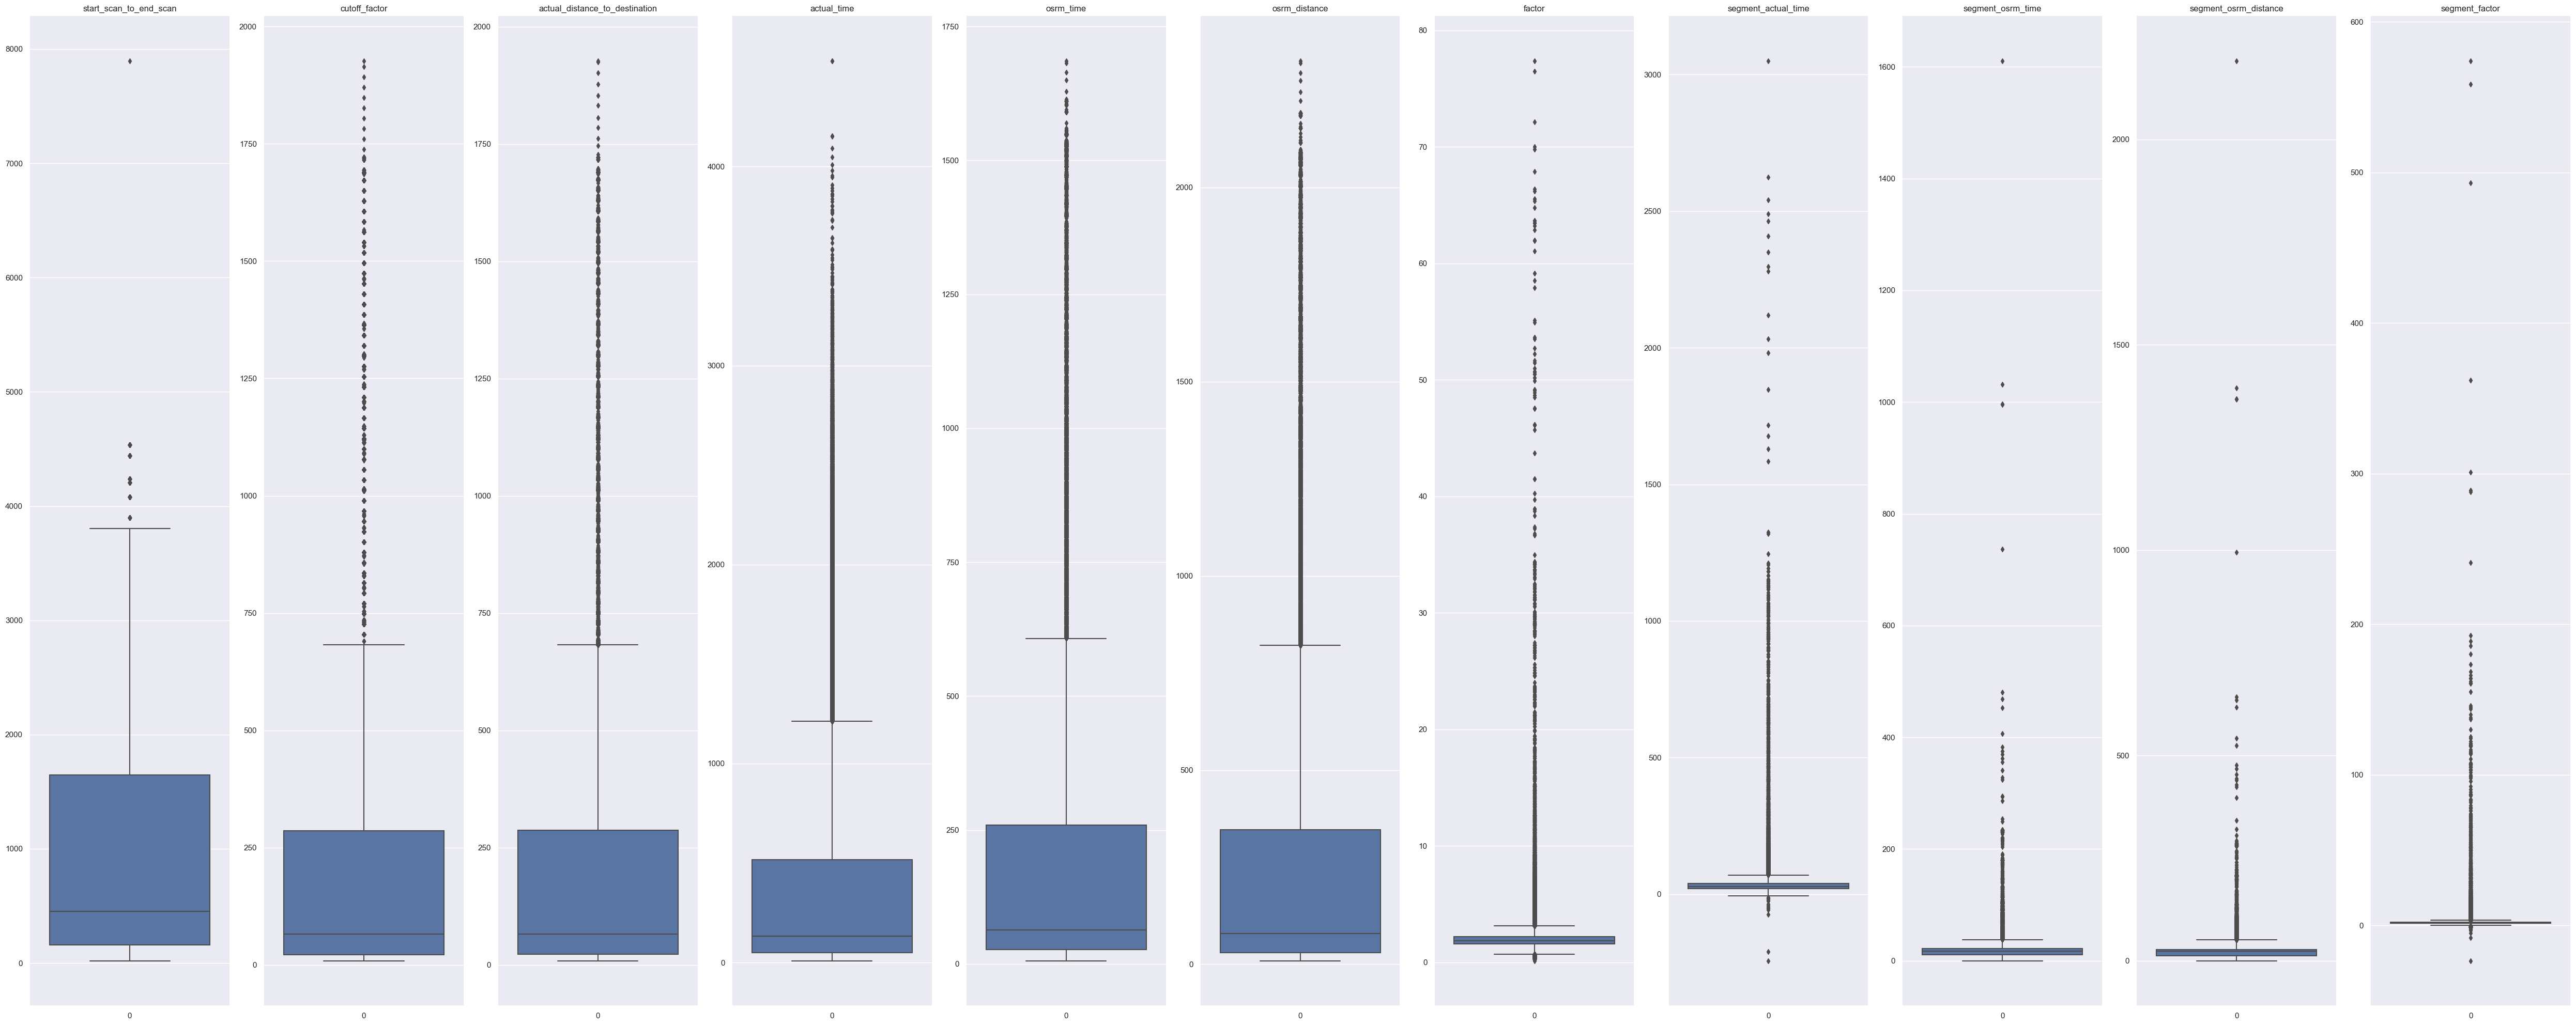

In [35]:
fig, axes = plt.subplots(1,11, figsize=(50,20))

for column, axis in zip(df_numeric.columns, axes):
        sns.boxplot(data=df_numeric[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)


plt.tight_layout()
plt.show()

## Performing  Log Transform on Numeric Columns

In [36]:
df_numeric = df_numeric.dropna()
df_numeric = np.log(df_numeric)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

divide by zero encountered in log

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning:

invalid value encountered in log



## Plotting Boxplots of Numeric Columns after Log Transformation

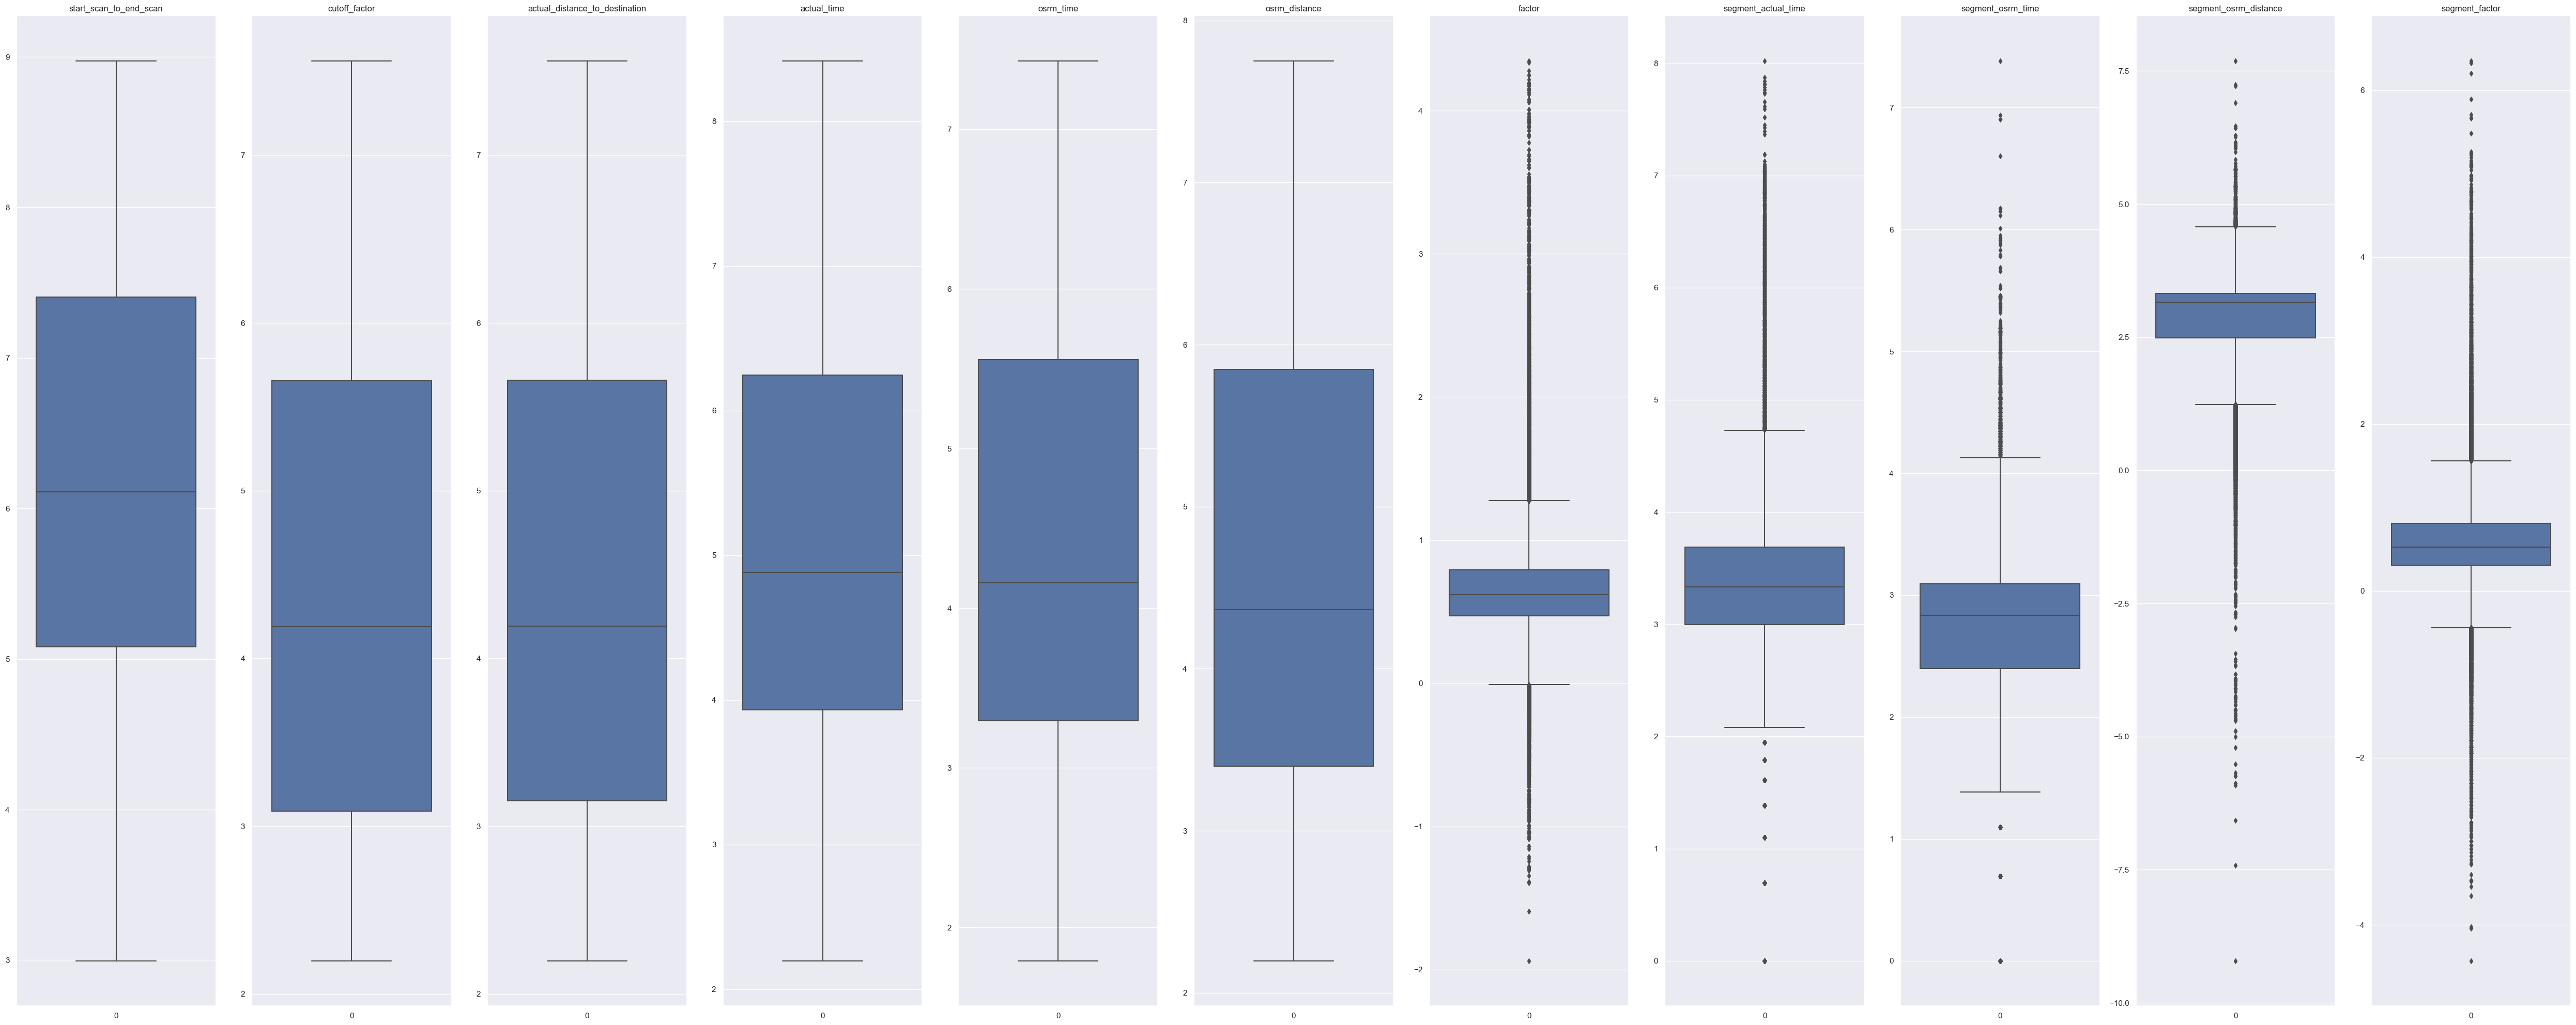

In [37]:
# Create the figure and two subplots
fig, axes = plt.subplots(1,11, figsize=(50,20))

# Create the boxplot with Seaborn
for column, axis in zip(df_numeric.columns, axes):
        sns.boxplot(data=df_numeric[column], ax=axis) 
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

## Capping Outlier by the IQR Method

In [38]:
# Function to cap outliers by the IQR method
def cap_outliers_iqr(data_column, multiplier=1.5):
    # Calculate the IQR
    q25 = np.percentile(data_column, 25)
    q75 = np.percentile(data_column, 75)
    iqr = q75 - q25
    
    # Define the lower and upper bounds
    lower_bound = q25 - multiplier * iqr
    upper_bound = q75 + multiplier * iqr
    
    # Cap the outliers
    capped_values = np.clip(data_column, lower_bound, upper_bound)
    
    return capped_values


for i in numerical_columns:
    df[i] = cap_outliers_iqr(df[i])

df.head(1)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  start_scan_to_end_scan  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   

   ...                  timestamp  year month  day        date  \
0  ... 2018-09-20 02:35:36.476840  2018     9   20  2018-09-20   

              time    state   city    place  time_taken  
0  02:35:36.476840  Gujarat  Anand  VUNagar   86.213637  

[1 rows x 32 columns]

## Applying StandardScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
for i in numerical_columns:
    df[[i]] = scaler.fit_transform(df[[i]])


## Using One Hot Encoding

In [40]:
for i in ['year','day','month']:    
    df[i] = df[i].astype('category')

In [41]:
cat = ['route_type', 'is_cutoff','segment_osrm_time','year','day','month','state','source_name','destination_name','city']

In [42]:
for i in cat:
    route_type_encoded = pd.get_dummies(df[i], prefix = i)
    df_encoded = pd.concat([df, route_type_encoded], axis=1)

df_encoded.head()
    





data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  start_scan_to_end_scan  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)                    86.0   

   ...  city_Wai  city_Wanaparthy city_Wankaner  city_Warangal  city_Wardha  \
0  ...     False            False         False          False        False   
1  ...     False            False         False          False        False   
2  ...     False            False         False          False        False   
3  ...     False            False         False          False        False   
4  ...     False            False         False          False        False   

   city_Weir  city_YamunaNagar  city_Yellandu  city_Yellareddy  city_Zahirabad  
0      False             False          False            False           False  
1      False             False          False            False           False  
2      False             False          False            False           False  
3      False             False          False            False           False  
4      False             False          False            False           False  

[5 rows x 1292 columns]